# Final Project Notebook

---

## Introduction

This project was all about answering the question of: ***What is the best neighborhood in Pittsburgh?*** To determine this, we used data from the WPRDC, the Western Pennsylvanian Data Center.

As we were deciding upon what metric to use in determining the best neighborhood in Pittsburgh, we first looked at a dataset containing air quality indexes throughout Allegheny County. We considered environmental friendliness as a metric. As we searched for more datasets, we found some relating to affordances of parks throughout Allegheny County.

Environmental friendliness and sustainability is an important metric, but a neighborhood's appeal extends beyond environmental considerations to include the quality of life that it offers. The availability of high quality parks, trails, and open spaces greatly adds to the appeal of a neighborhood and the quality of life of those living there. So, for our project we decided to consider outdoor recreation affordance in each neighborhood.

---

## The Metric

Our metric, outdoor recreation affordance, represents a holistic evaluation of a neighborhood's ability to provide outdoor recreational experiences for its residents. To formulate this metric, we evaluated three primary datasets: Allegheny County Trail Locations, Allegheny County Park Features, and City of Pittsburgh Pools.

The Allegheny Count Trails Locations dataset was used to measure trail mileage, with greater mileage being defined as better. The Allegheny County Park Features dataset was used to measure park capacity by taking the sum of the capacities of each feature the park has. The City of Pittsburgh Pools dataset was used as an initial filter to narrow down the amount of parks to compare. The parks were ranked on pool water capacity.

---

## The Best Neighborhood

The best neighborhood in Pittsburgh is....

**Allegheny Center!**

The metric was Outdoor Recreational Affordance, so to come to this conclusion, we evaluated the neighborhoods through the data about the nearby parks and pools.

To limit the amount of neighborhoods we were comparing, we used the City of Pittsburgh Pools dataset. This dataset contained information about pools in Pittsburgh parks, and specifically, the capacities of all of them. We totaled each neighborhood's pool capacities and ranked them in order.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

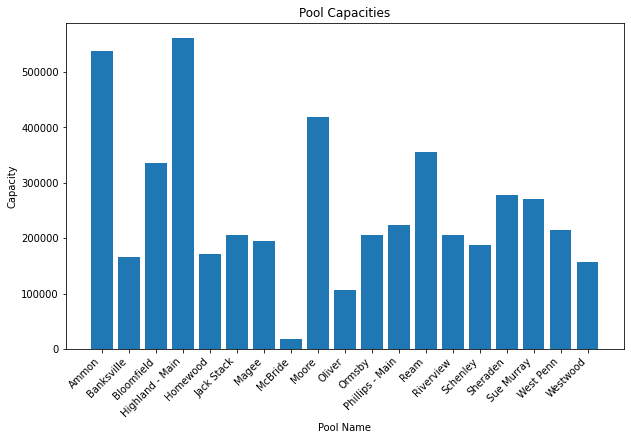

In [17]:
df = pd.read_csv('pools.csv')
pools_df = df[df['type'] == 'Pool']
pools_df = pools_df[pools_df['name'] != 'Highland - Children']

neighborhoods_df = pools_df[['name','neighborhood','capacity']]

order_by_column = 'capacity'
neighborhoods_df = neighborhoods_df.sort_values(by=order_by_column, ascending=False).reset_index(drop=True)

neighborhoods_df.index += 1

ax = plt.subplots(figsize=(10, 6))

plt.bar(pools_df['name'], pools_df['capacity'])
plt.xlabel('Pool Name')
plt.ylabel('Capacity')
plt.title('Pool Capacities')
plt.xticks(rotation=45, ha='right')
plt.show()

The neighborhoods with pool capacities greater than 20,000 were chosen to be compared, giving us the following neighborhoods:

1. Highland Park
2. Bedford Dwellings
3. Brookline
4. Mount Washington
5. Bloomfield
6. Sheraden
7. Allegheny Center
8. Carrick
9. Polish Hill
10. Brighton Heights
11. South Side Flats
12. Perry North

Next, two following datasets were used to score the various parks nearby.

The Allegheny County Park Features dataset provided the capacities for features that each park contains. The capacities from each feature were totaled for each park to get a final park capacity, based off all those features.

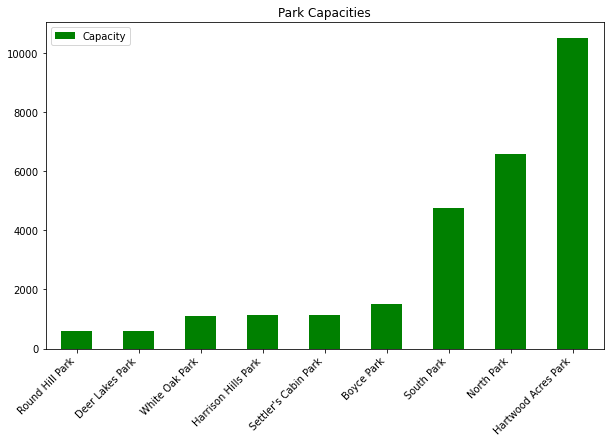

In [41]:
df = pd.read_csv("park_features.csv")
df = df[["center", "feature_name", "capacity"]]

all_parks = []
for row in range(len(df)):
    if df.iloc[row,0] not in all_parks:
        all_parks.append(df.iloc[row,0])

park_capacities = {}
for park in all_parks:
    for row in range(len(df)):
        capacity = df.iloc[row,2]
        if df.iloc[row,0] == park and capacity == float(capacity):
            if park in park_capacities:
                park_capacities[park] += capacity
            else:
                park_capacities[park] = capacity

sorted_capacities = sorted(park_capacities.items(), key=lambda x:x[1])
park_capacities = dict(sorted_capacities)

capacity = pd.DataFrame.from_dict(park_capacities, orient='index', columns=['Capacity']).sort_values(by='Capacity')
capacity.plot(kind='bar', figsize =(10,6),color='g')
plt.title('Park Capacities')
plt.xticks(rotation=45, ha='right')
plt.show()

Knowing the capacities of the parks, they next needed to be scored. To score them, it was decided that a perfect score (a 100) would be the capacity of the park with the greatest capacity. The other parks scores would be their capacity as a percentage out of that perfect score/capacity.

In [37]:
scores = {}
for park in park_capacities:
    scores[park] = round(((park_capacities[park]*100)/10500.0), 1)

print("Park Scores\n")
for i in scores:
    print("{0:30} {1}".format(i, scores[i]))

Park Scores

Round Hill Park                5.5
Deer Lakes Park                5.6
White Oak Park                 10.6
Harrison Hills Park            10.8
Settler's Cabin Park           10.9
Boyce Park                     14.4
South Park                     45.3
North Park                     62.6
Hartwood Acres Park            100.0


After this, the Allegheny County Trails Locations data was analyzed. This data contained mileage for trails within the parks. To score the parks, total mileage was calculated for each park. Knowing the total mileage, the parks' scores were their mileage as a percentage out of the highest mileage.

In [43]:
df = pd.read_csv('trail_locations.csv')
difficulty_order = ['Easy', 'Easy-Moderate', 'Moderate', 'Moderate-Difficult', 'Difficult']
df['difficulty'] = pd.Categorical(df['difficulty'], categories=difficulty_order, ordered=True)
park_totals = df.groupby(['park_name', 'difficulty'])['mileage'].sum().reset_index()
mileage_pivot = park_totals.pivot(index='park_name', columns='difficulty', values='mileage')
colors = {'Easy': '#FFD700', 'Easy-Moderate': '#FFA500', 'Moderate': '#FF8C00', 'Moderate-Difficult': '#FF4500', 'Difficult': '#FF0000'}
mileage_pivot = mileage_pivot[difficulty_order]

mileages = {}
count = 0
for row in park_totals['park_name']:
    if row in mileages:
        mileages[row] += park_totals.iloc[count,2]
    else:
        mileages[row] = park_totals.iloc[count,2]
    count += 1
scores = {}
for park in mileages:
    scores[park] = round(((mileages[park]*100)/50.93533774), 1)
print("Park Scores\n")
for i in scores:
    print("{0:30} {1}".format(i, scores[i]))

Park Scores

Boyce                          43.0
Deer Lakes                     39.4
Harrison Hills                 33.8
Hartwood Acres                 31.0
North Park                     100.0
Round Hill                     3.1
Settlers Cabin                 30.2
South Park                     30.0
White Oak                      22.3


To combine the two analyses in order to score the neighborhoods, these park scores were averaged to get a sinlge score for each park.

**Park Totals**

1. North Park - 81.3
2. Hartwood Acres - 65.5
3. South Park - 37.7
4. White Oak Park - 32.9
5. Boyce Park - 28.7
6. Deer Lakes Park - 22.5
7. Harrison Hills Park - 22.3
8. Settler's Cabin Park - 20.6
9. Round Hill Park - 4.3

For our final calculation to determine the best Pittsburhg neighborhood, we will only be considering the parks scored 25 or greater. This leaves us with the top 5 scored parks.

To finally score the neighborhoods, the following is done:

Each neighborhood inherits the scores of the parks within a 24 minute drive of it. This way, all the neighborhoods can be ranked by the quality of the parks, and in turn, the affordance of outdoor recreational activities.

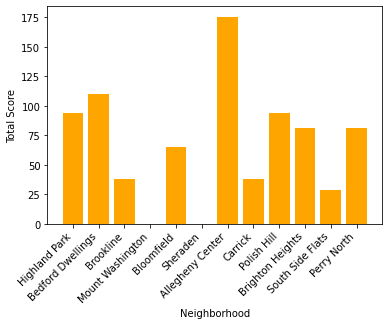

,Neighborhood,North Park,Hartwood Acres,South Park,White Oak Park,Boyce Park,Neighborhood_Total
6,Allegheny Center,22,21,29,29,24,175.5
1,Bedford Dwellings,24,25,29,28,24,110.0
0,Highland Park,28,22,37,31,23,94.2
8,Polish Hill,26,22,29,29,24,94.2
9,Brighton Heights,23,25,26,32,28,81.3
11,Perry North,20,25,30,30,26,81.3
4,Bloomfield,28,23,29,31,28,65.5
2,Brookline,28,28,21,30,26,37.7
7,Carrick,29,28,19,28,28,37.7
10,South Side Flats,25,25,26,27,23,28.7


In [57]:
df = pd.read_csv("park_distances.csv")
park_scores = {'North Park': 81.3, 'Hartwood Acres': 65.5, 'South Park': 37.7, 'White Oak Park': 32.9, 'Boyce Park': 28.7}

result_df = df.copy()
result_df['Neighborhood_Total'] = 0

for index, row in result_df.iterrows():
    for park, value in park_scores.items():
        if row[park] <= 24:
            result_df.at[index, 'Neighborhood_Total'] += value
            
plt.bar(result_df['Neighborhood'], result_df['Neighborhood_Total'], color='orange')
plt.xlabel('Neighborhood')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.show()

result_df = result_df.sort_values(by='Neighborhood_Total', ascending=False)
display(result_df)
#print(result_df.to_string(index=False))

From this, we can see the obvious conclusion: Allegheny Center is the best neighborhood in Pittsburgh.

This comes from Allegheny County having high scoring parks within a 24 minute drive of it. The parks within 24 minutes of Allegheny County have high trail mileage and high visitor capacities, both factors that allow people to do outdoor recreational activities.

---

# Conclusions